# Ejercicio 7
# Práctica 3
# Javier Francisco Castilla Jiménez 

In [123]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('Solarize_Light2')
%matplotlib inline

In [124]:
########## cargamos datos
neuronas=['G01','G05','G1','G2','GS3']
n=[nrn.importar('NeuronaSimulada'+neuron+'.csv') for neuron in neuronas]
DatosG={neuronas[i]:n[i]for i in range(len(n))} # diccionario por neurona de lista de listas con los np.ndarrays de lod tiempos de ocurrencia de las espigas

In [125]:
def drawDistributions(sample1,sample2,bins,musg1,musg2,titulo,figsize=(9,5)):
    """esta función solo es para dibuja mis distribuciones"""
    mu1,sg1=musg1
    mu2,sg2=musg2
    fig=plt.figure(figsize=figsize)# se crea figura 
    ax=fig.add_subplot(111)
    #blue
    ax.bar(bins[1:],dist1,width=np.diff(bins),color='darkblue',label='Dist1') # distribución de probabilidad
    ax.vlines(mu1,0,0.075,ls='--',label='media1='+str(mu1),color='orange')
    ax.hlines(0.075,mu1-sg1,mu1+sg1,ls='--',label='sigma1='+str(sg1),color='orange')
    #orange
    ax.bar(bins[1:],dist2,width=np.diff(bins),color='pink',label='Dist2')# distribución de probabilidad
    ax.vlines(mu2,0,0.070,ls='--',label='media2='+str(mu2),color='red')
    ax.hlines(0.070,mu2-sg2,mu2+sg2,ls='--',label='sigma2='+str(sg2),color='red',alpha=0.5)
    ax.set_title(titulo,fontsize=14,color='red')# titulo de figura
    ax.legend()
    return fig

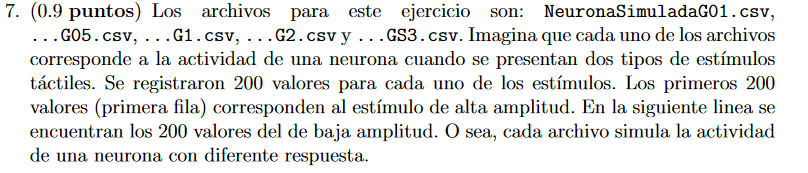

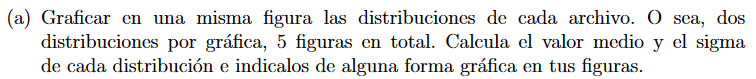

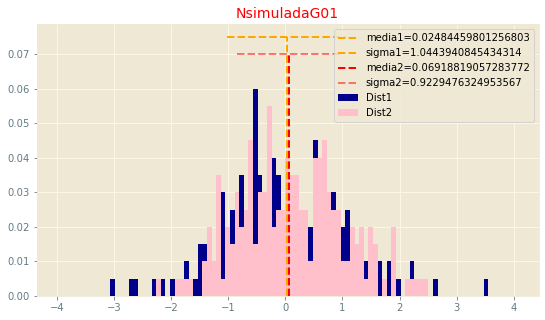

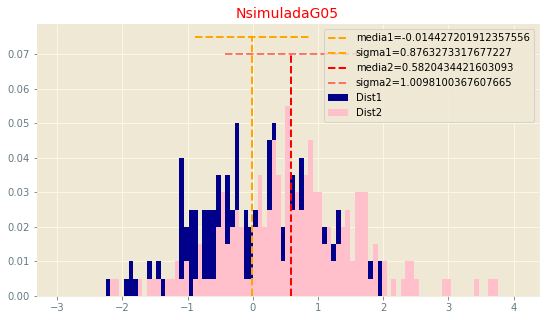

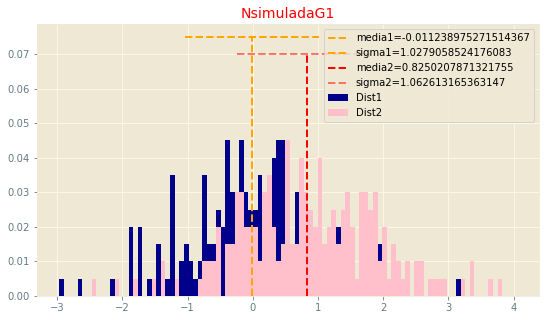

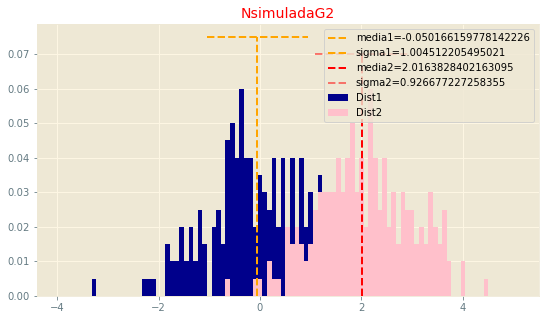

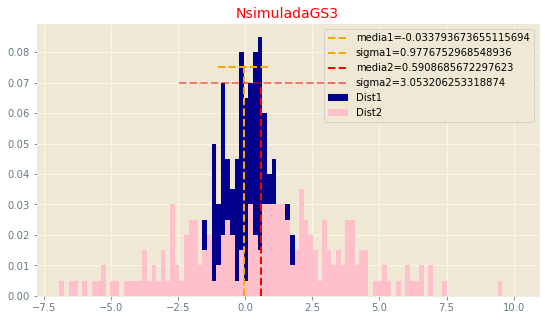

In [126]:
datos=dict()
for neuron in neuronas:
    data1=DatosG[neuron][0]
    data2=DatosG[neuron][1]
    dist1,dist2,bins=nrn.getDistributions(data1,data2)
    mu1,sg1=np.mean(data1),np.std(data1)
    mu2,sg2=np.mean(data2),np.std(data2)
    dictio={'dist1':dist1,'dist2':dist2,'bins':bins,'musg1':[mu1,sg1],'musg2':[mu2,sg2]}
    datos.update({neuron:dictio})
#####################GRAFICAS
for neuron in neuronas:
    dist1=datos[neuron]['dist1']
    dist2=datos[neuron]['dist2']
    musg1=datos[neuron]['musg1']
    musg2=datos[neuron]['musg2']
    bins=datos[neuron]['bins']
    drawDistributions(dist1,dist2,bins,musg1,musg2,titulo='Nsimulada'+neuron)

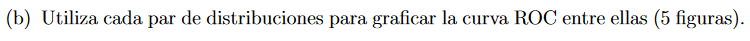

valor de AUROC de G01 0.5088625000000003


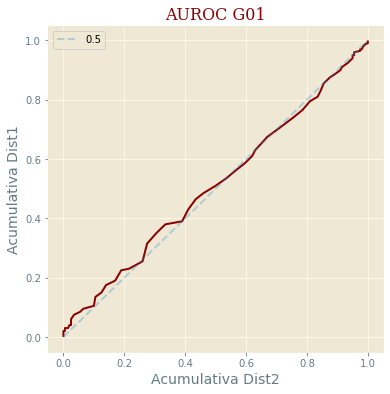

valor de AUROC de G05 0.6736500000000007


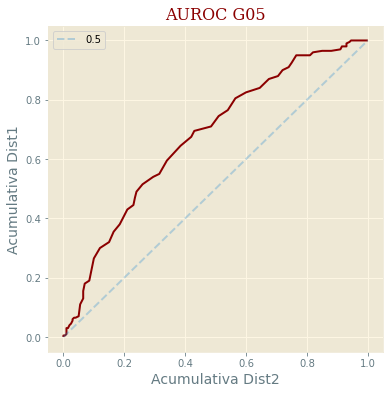

valor de AUROC de G1 0.7200875000000007


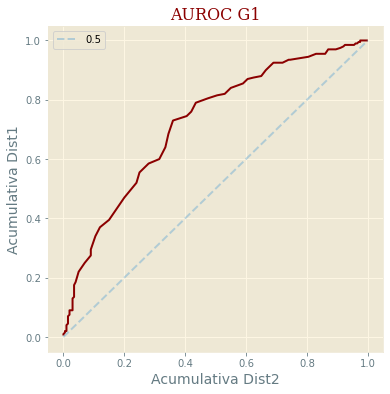

valor de AUROC de G2 0.9337000000000004


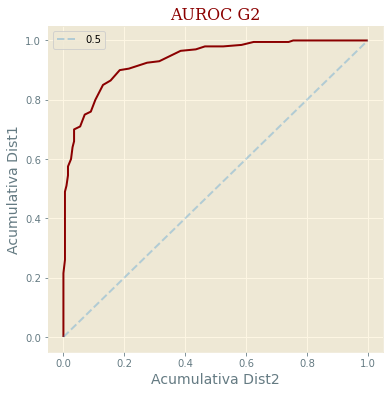

valor de AUROC de GS3 0.5919125000000006


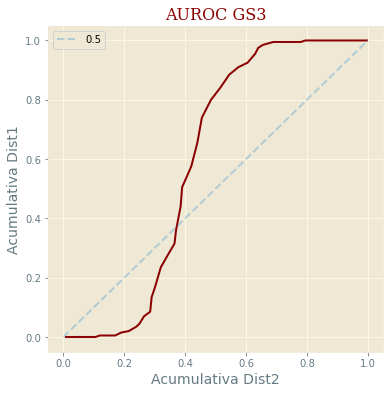

In [127]:
ROCs=dict()
for neuron in neuronas:
    dist1=datos[neuron]['dist1']
    dist2=datos[neuron]['dist2']
    #AUROC
    auroc=nrn.getAUROC(dist1,dist2)
    ROCs.update({neuron:auroc})
    print('valor de AUROC de '+neuron,auroc)
    #GRAFICA
    cu1=np.cumsum(dist1) # suma acumulativa de la distribución 1, 
    cu2=np.cumsum(dist2) # suma acumulativa de las distribución 2, 
    x=np.linspace(0,1,100)
    fig=plt.figure(figsize=(6,6))
    plt.plot(cu2,cu1,color='darkred')
    plt.plot(x,x,label=0.5,ls="--",alpha=0.3)
    plt.xlabel("Acumulativa Dist2",fontsize=14)
    plt.ylabel("Acumulativa Dist1",fontsize=14)
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
    plt.title("AUROC "+neuron,fontdict_title)
    plt.legend()
    plt.show()

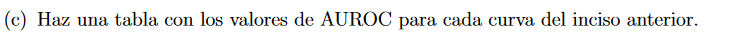

In [128]:
print("Neuronas\t AUROC")# imprimimos encabezados de nuestra tabla de frecuencias
for neuron in neuronas :#ciclamos para imprimir columnas de la tabla 
    print("{}\t {}".format(neuron,ROCs[neuron]))#damos formato de salida 

    


Neuronas	 AUROC
G01	 0.5088625000000003
G05	 0.6736500000000007
G1	 0.7200875000000007
G2	 0.9337000000000004
GS3	 0.5919125000000006


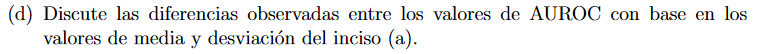

A medida que el valor absoluta de la diferencia de las medias crece, el valor de AUROC se hace más grande.
De igual forma a medida que los sigmas son más pequeño el valor de AUROC se hace más grande.
De forma que el valor del AUROC es directamente proporcional a la diferencia de las medias e inversamente proporcional al tamaño del sigma.

Por ejemplo si comparamos G05 y G3, la diferencia en sus medias es similare, pero lo que realmente causa que que haya variaciones notables en valor del AUCROC es el hecho de que los estimulos de baja amplitud tiene un sigma muy alto. 

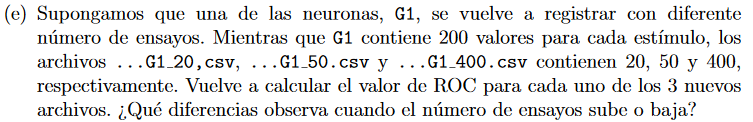

Cuando aumenta la n el AUROC es más preciso, porque la muestra está más cerca de los valores poblacionales reales, esto se observa en el caso de 400 datos.
En cambio en el caso de 50 y 20 datos por puro azar es más probable que la distribución se aleje de la real.

In [118]:
########## cargamos datos
neuronas2=['G1_20','G1_50','G1_400']
n2=[nrn.importar('NeuronaSimulada'+neuron+'.csv') for neuron in neuronas2]
DatosG2={neuronas2[i]:n2[i]for i in range(len(n2))} # diccionario por neurona de lista de listas con los np.ndarrays de lod tiempos de ocurrencia de las espigas

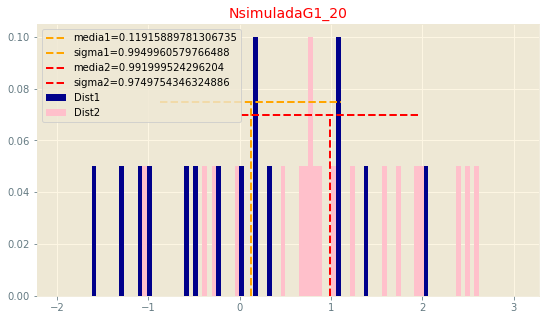

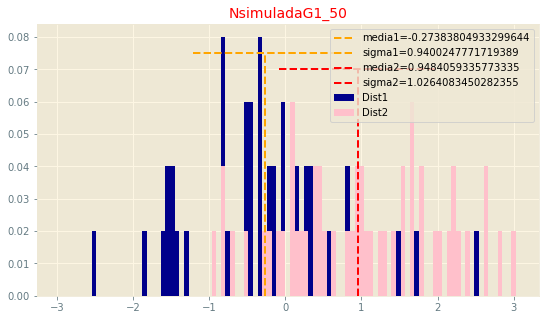

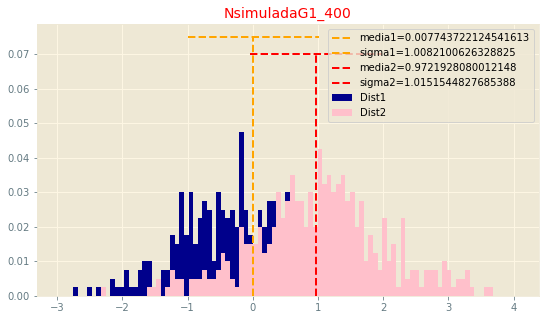

In [119]:
datos2=dict()
for neuron in neuronas2:
    data1=DatosG2[neuron][0]
    data2=DatosG2[neuron][1]
    dist1,dist2,bins=nrn.getDistributions(data1,data2)
    mu1,sg1=np.mean(data1),np.std(data1)
    mu2,sg2=np.mean(data2),np.std(data2)
    dictio={'dist1':dist1,'dist2':dist2,'bins':bins,'musg1':[mu1,sg1],'musg2':[mu2,sg2]}
    datos2.update({neuron:dictio})
#####################GRAFICAS
for neuron in neuronas2:
    dist1=datos2[neuron]['dist1']
    dist2=datos2[neuron]['dist2']
    musg1=datos2[neuron]['musg1']
    musg2=datos2[neuron]['musg2']
    bins=datos2[neuron]['bins']
    drawDistributions(dist1,dist2,bins,musg1,musg2,titulo='Nsimulada'+neuron)

valor de AUROC de G1_20 0.7250000000000003


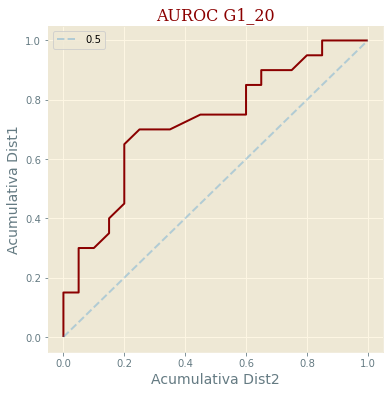

valor de AUROC de G1_50 0.8064000000000007


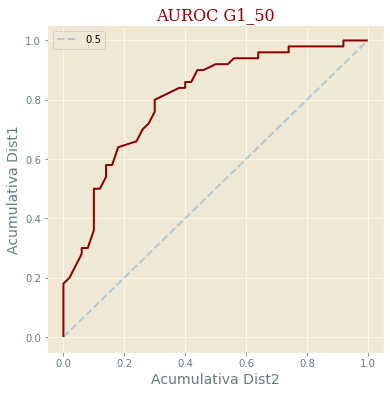

valor de AUROC de G1_400 0.7485906249999993


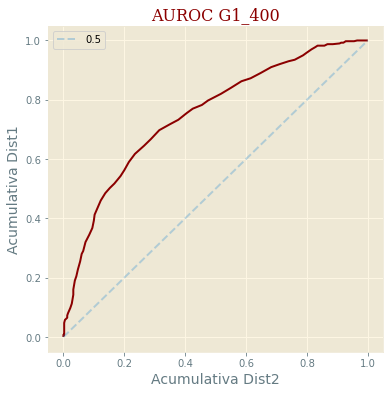

In [120]:
ROCs2=dict()
for neuron in neuronas2:
    dist1=datos2[neuron]['dist1']
    dist2=datos2[neuron]['dist2']
    #AUROC
    auroc=nrn.getAUROC(dist1,dist2)
    ROCs2.update({neuron:auroc})
    print('valor de AUROC de '+neuron,auroc)
    #GRAFICA
    cu1=np.cumsum(dist1) # suma acumulativa de la distribución 1, 
    cu2=np.cumsum(dist2) # suma acumulativa de las distribución 2, 
    x=np.linspace(0,1,100)
    fig=plt.figure(figsize=(6,6))
    plt.plot(cu2,cu1,color='darkred')
    plt.plot(x,x,label=0.5,ls="--",alpha=0.3)
    plt.xlabel("Acumulativa Dist2",fontsize=14)
    plt.ylabel("Acumulativa Dist1",fontsize=14)
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
    plt.title("AUROC "+neuron,fontdict_title)
    plt.legend()
    plt.show()

In [121]:
print("Neuronas\t AUROC")# imprimimos encabezados de nuestra tabla de frecuencias
for neuron in neuronas2 :#ciclamos para imprimir columnas de la tabla 
    print("{}\t {}".format(neuron,ROCs2[neuron]))#damos formato de salida 


Neuronas	 AUROC
G1_20	 0.7250000000000003
G1_50	 0.8064000000000007
G1_400	 0.7485906249999993
